In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output

from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
import os
import sys
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('see_all_expewriments.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [4]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [5]:
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'

# iteration = '1'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_5760-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_2-CloseTime_True-TS_False'


# iteration = '2'
# path = 'Mode_train-Model_random_forest-TrainWw_1920-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_4-CloseTime_True-TS_False'


# iteration = '3'
# root_path = f'./backbone/data/backtest/experiments/{iteration}'

root_path = f'./backbone/data/backtest/experiments/'
path = 'Model_None-TrainWw_0-TrainPd_0-TradStgy_smi_adx-SLStgy_n_pips-TPStgy_risk_reward-PerFwTg_24-SL_15-RR_2-TS_False'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_24-TradStgy_bband_sell_stgy-PerFwTg_12-SL_15-RR_3-CloseTime_True-TS_False'


	
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [6]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,9f4ab787-5022-11ef-88b8-f7a510197866,USDCHF,OperationType.SELL,2021-01-05 19:00:00,2021-01-06 03:00:00,0.8780,0.8780,0.8794,-10.0005,0.8794,0.8750,6667,-0.0015,ClosePositionType.STOP_LOSS
1,9f92baa1-5022-11ef-8d40-f7a510197866,EURUSD,OperationType.BUY,2021-01-06 09:00:00,2021-01-06 10:00:00,1.2340,1.2340,1.2325,-9.9000,1.2325,1.2369,6600,-0.0015,ClosePositionType.STOP_LOSS
2,9f942c31-5022-11ef-a5ee-f7a510197866,USDCHF,OperationType.SELL,2021-01-06 09:00:00,2021-01-06 15:00:00,0.8762,0.8762,0.8777,-9.9000,0.8777,0.8732,6600,-0.0015,ClosePositionType.STOP_LOSS
3,a04d9227-5022-11ef-86ca-f7a510197866,GBPUSD,OperationType.SELL,2021-01-07 18:00:00,2021-01-07 20:00:00,1.3549,1.3549,1.3564,-9.7020,1.3564,1.3519,6468,-0.0015,ClosePositionType.STOP_LOSS
4,a0ada5a3-5022-11ef-b10f-f7a510197866,AUDUSD,OperationType.BUY,2021-01-08 08:00:00,2021-01-08 10:00:00,0.7777,0.7777,0.7762,-9.6045,0.7762,0.7807,6403,-0.0015,ClosePositionType.STOP_LOSS
5,a0c3ca70-5022-11ef-a7f6-f7a510197866,EURUSD,OperationType.SELL,2021-01-08 12:00:00,2021-01-08 15:00:00,1.2239,1.2239,1.2254,-9.5085,1.2254,1.2209,6339,-0.0015,ClosePositionType.STOP_LOSS
6,a0ecc085-5022-11ef-b210-f7a510197866,EURUSD,OperationType.SELL,2021-01-08 20:00:00,2021-01-08 21:00:00,1.2195,1.2195,1.2210,-9.4140,1.2210,1.2165,6276,-0.0015,ClosePositionType.STOP_LOSS
7,a114cfe9-5022-11ef-9d69-f7a510197866,USDJPY,OperationType.BUY,2021-01-11 04:00:00,2021-01-12 04:00:00,104.1260,104.1260,104.3030,10.9740,103.9760,104.4260,62,0.1770,ClosePositionType.DAYS
8,a19596f8-5022-11ef-a0b0-f7a510197866,AUDUSD,OperationType.SELL,2021-01-12 00:00:00,2021-01-12 01:00:00,0.7696,0.7696,0.7711,-9.3195,0.7711,0.7666,6213,-0.0015,ClosePositionType.STOP_LOSS
9,a1c8c175-5022-11ef-a6a3-f7a510197866,USDCHF,OperationType.BUY,2021-01-12 07:00:00,2021-01-12 11:00:00,0.8907,0.8907,0.8892,-9.3360,0.8892,0.8937,6224,-0.0015,ClosePositionType.STOP_LOSS


In [7]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

[]

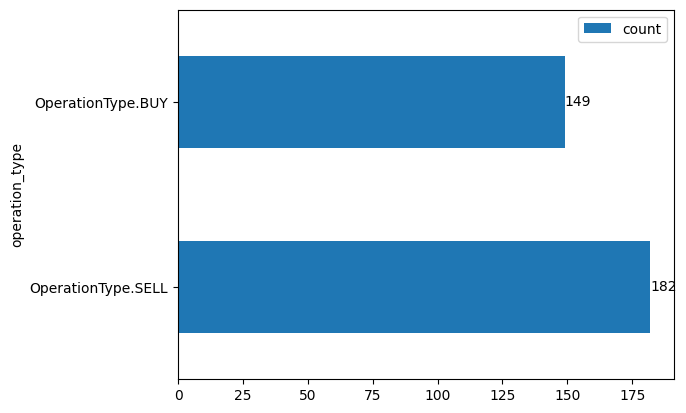

In [8]:
ax = pd.DataFrame(orders.operation_type.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Compras que salieron bien

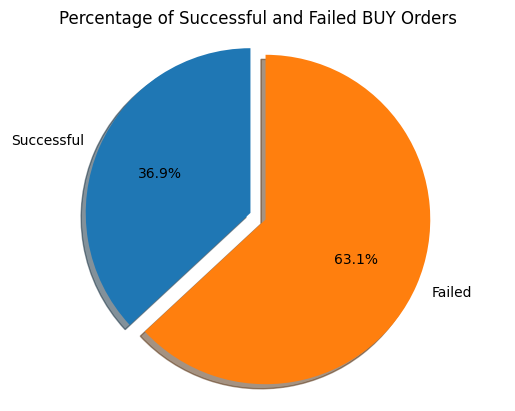

In [9]:
try:
    # Calcular el número de operaciones exitosas y fallidas
    successful_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] >= 0)].shape[0]
    failed_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] < 0)].shape[0]
    
    # Calcular los porcentajes
    total_buys = successful_buys + failed_buys
    percent_successful = (successful_buys / total_buys) * 100
    percent_failed = (failed_buys / total_buys) * 100
    
    # Crear un gráfico de torta
    labels = 'Successful', 'Failed'
    sizes = [percent_successful, percent_failed]
    explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title('Percentage of Successful and Failed BUY Orders')
    plt.show()
except:
    print('no hay compras')

# Ventas que salieron bien

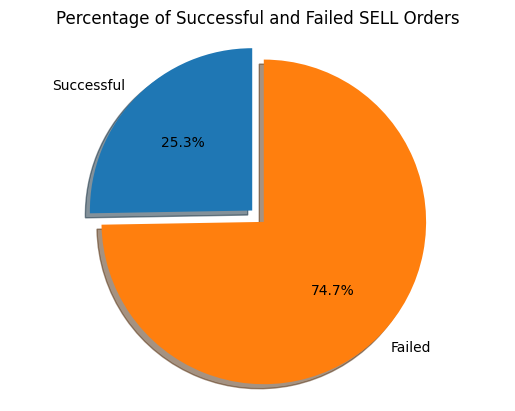

In [10]:
# Calcular el número de operaciones exitosas y fallidas
successful_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] >= 0)].shape[0]
failed_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] < 0)].shape[0]

# Calcular los porcentajes
total_buys = successful_buys + failed_buys
percent_successful = (successful_buys / total_buys) * 100
percent_failed = (failed_buys / total_buys) * 100

# Crear un gráfico de torta
labels = 'Successful', 'Failed'
sizes = [percent_successful, percent_failed]
explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL y TP

[]

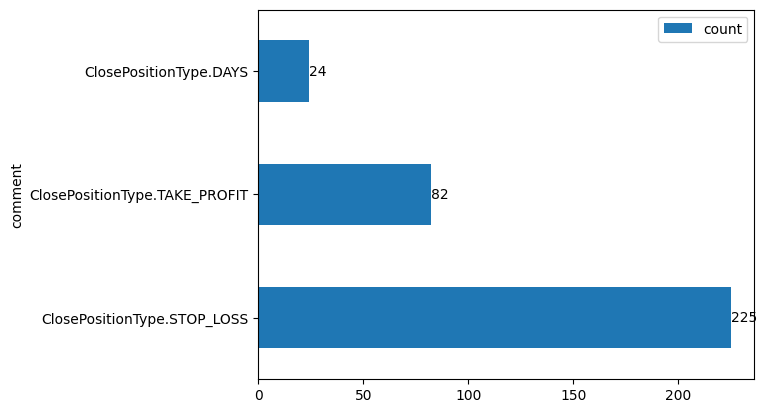

In [11]:
ax = pd.DataFrame(orders.comment.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Operaciones que cerraron por dias y quedaron positivas

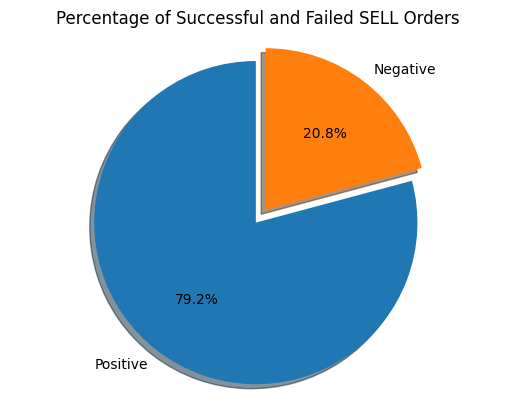

In [12]:
total_days = orders[orders['comment'] == 'ClosePositionType.DAYS']
positive_days = total_days[total_days['profit'] >= 0]
negative_days = total_days[total_days['profit'] < 0]

# Calcula los tamaños
total_count = total_days.shape[0]
positive_count = positive_days.shape[0]
negative_count = negative_days.shape[0]

# Calcula los porcentajes
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Crea los datos para el gráfico de torta
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]

explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL que terminaron positivos

In [13]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [14]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [15]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
5,USDJPY,20,25,100.2220,44.4444
2,GBPUSD,22,45,-12.5482,32.8358
1,EURUSD,18,40,-59.4657,31.0345
0,AUDUSD,12,33,-112.4163,26.6667
4,USDCHF,16,44,-154.6013,26.6667
3,USDCAD,13,43,-169.2980,23.2143


# Rendimiento por mes

In [16]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()

orders['close_time'] = pd.to_datetime(orders['close_time'])
orders_per_month['close_time'] = orders['close_time'].dt.to_period('M')


orders_per_month_gb = orders_per_month.groupby(by=['close_time']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2015-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)
orders_per_month_gb['perc_change_cumsum'] = orders_per_month_gb['perc_change'].cumsum()

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'close_time', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
    'perc_change_cumsum'
]].round(3)

,close_time,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change,perc_change_cumsum
0,2015-12,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN,NaN
0,2021-01,19,3.0000,15.0000,4.0000,15.0000,0.2110,18.0000,-76.7320,923.2680,-0.0770,-0.0770
1,2021-02,19,7.0000,11.0000,8.0000,11.0000,0.4210,18.9120,31.6020,954.8700,0.0340,-0.0430
2,2021-03,35,11.0000,22.0000,12.0000,23.0000,0.3430,19.8360,-1.2820,953.5880,-0.0010,-0.0440
3,2021-04,22,7.0000,15.0000,7.0000,15.0000,0.3180,20.2290,-11.6890,941.8980,-0.0120,-0.0560
4,2021-05,26,3.0000,23.0000,3.0000,23.0000,0.1150,17.1990,-148.9590,792.9390,-0.1580,-0.2140
5,2021-06,33,7.0000,21.0000,12.0000,21.0000,0.3640,15.8580,-38.1830,754.7560,-0.0480,-0.2620
6,2021-07,24,7.0000,14.0000,9.0000,15.0000,0.3750,15.8430,12.8550,767.6110,0.0170,-0.2450
7,2021-08,33,10.0000,19.0000,14.0000,19.0000,0.4240,17.7270,41.4120,809.0230,0.0540,-0.1910
8,2021-09,37,9.0000,25.0000,10.0000,27.0000,0.2700,16.3410,-61.5990,747.4230,-0.0760,-0.2670


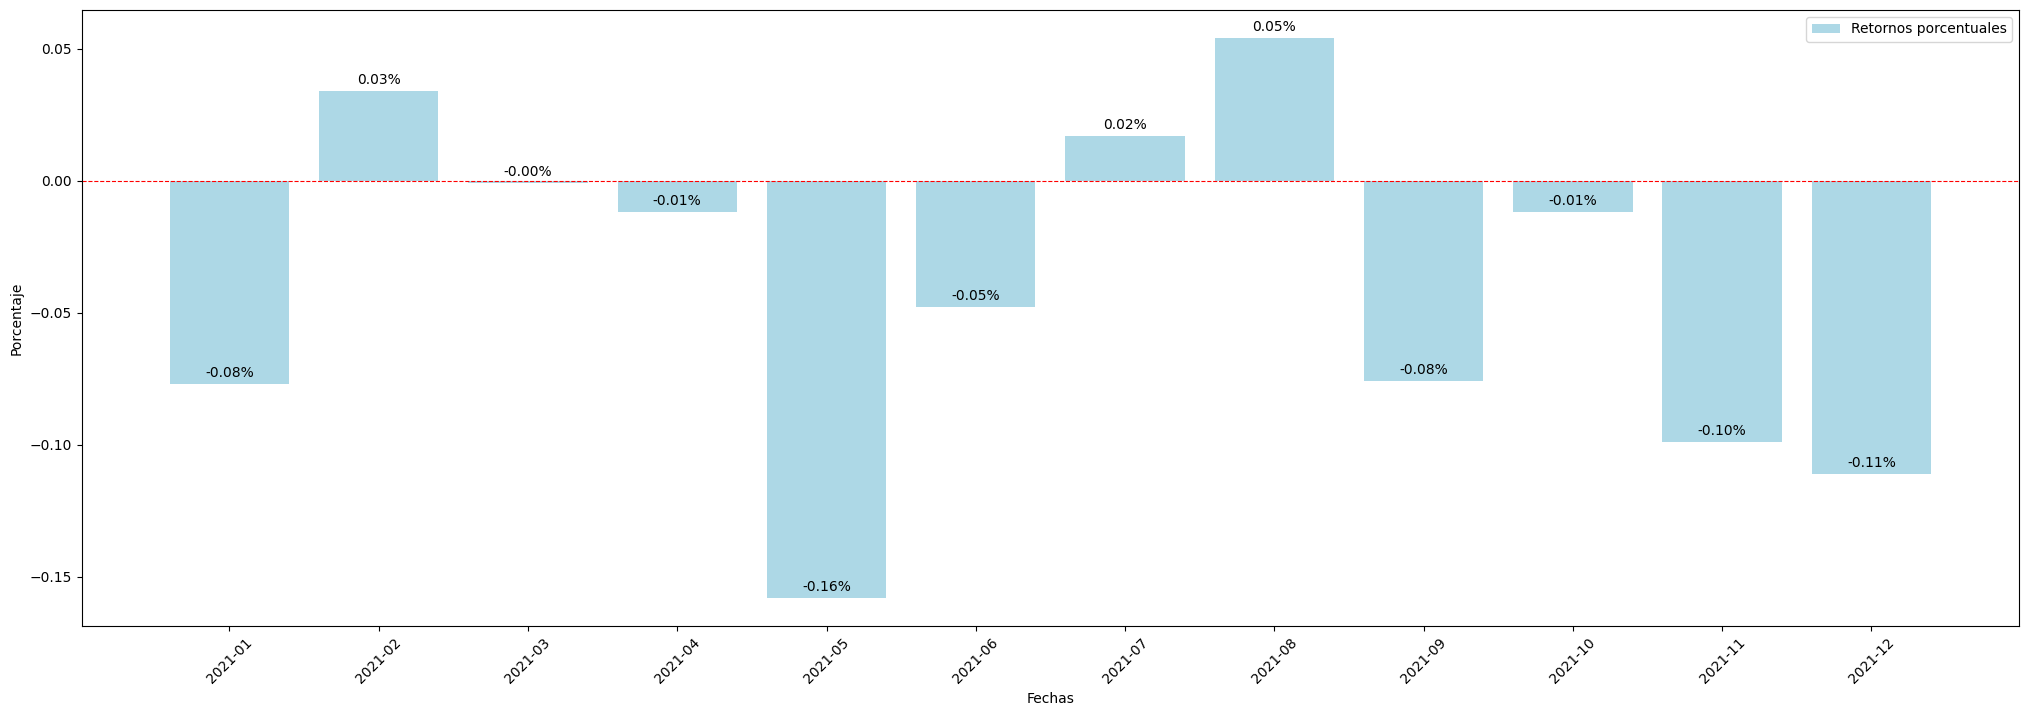

In [17]:
import matplotlib.pyplot as plt

# Datos de ejemplo
grow_perc = orders_per_month_gb[['close_time', 'perc_change']]
fig, ax = plt.subplots(figsize=(25, 8))

x = grow_perc['close_time'].astype(str)
y = grow_perc['perc_change']

# Crear barras
bars = ax.bar(x, y, label='Retornos porcentuales', color='lightblue')

# Agregar etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Agregar una línea de puntos horizontal en el valor 0
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Porcentaje')
ax.legend()

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


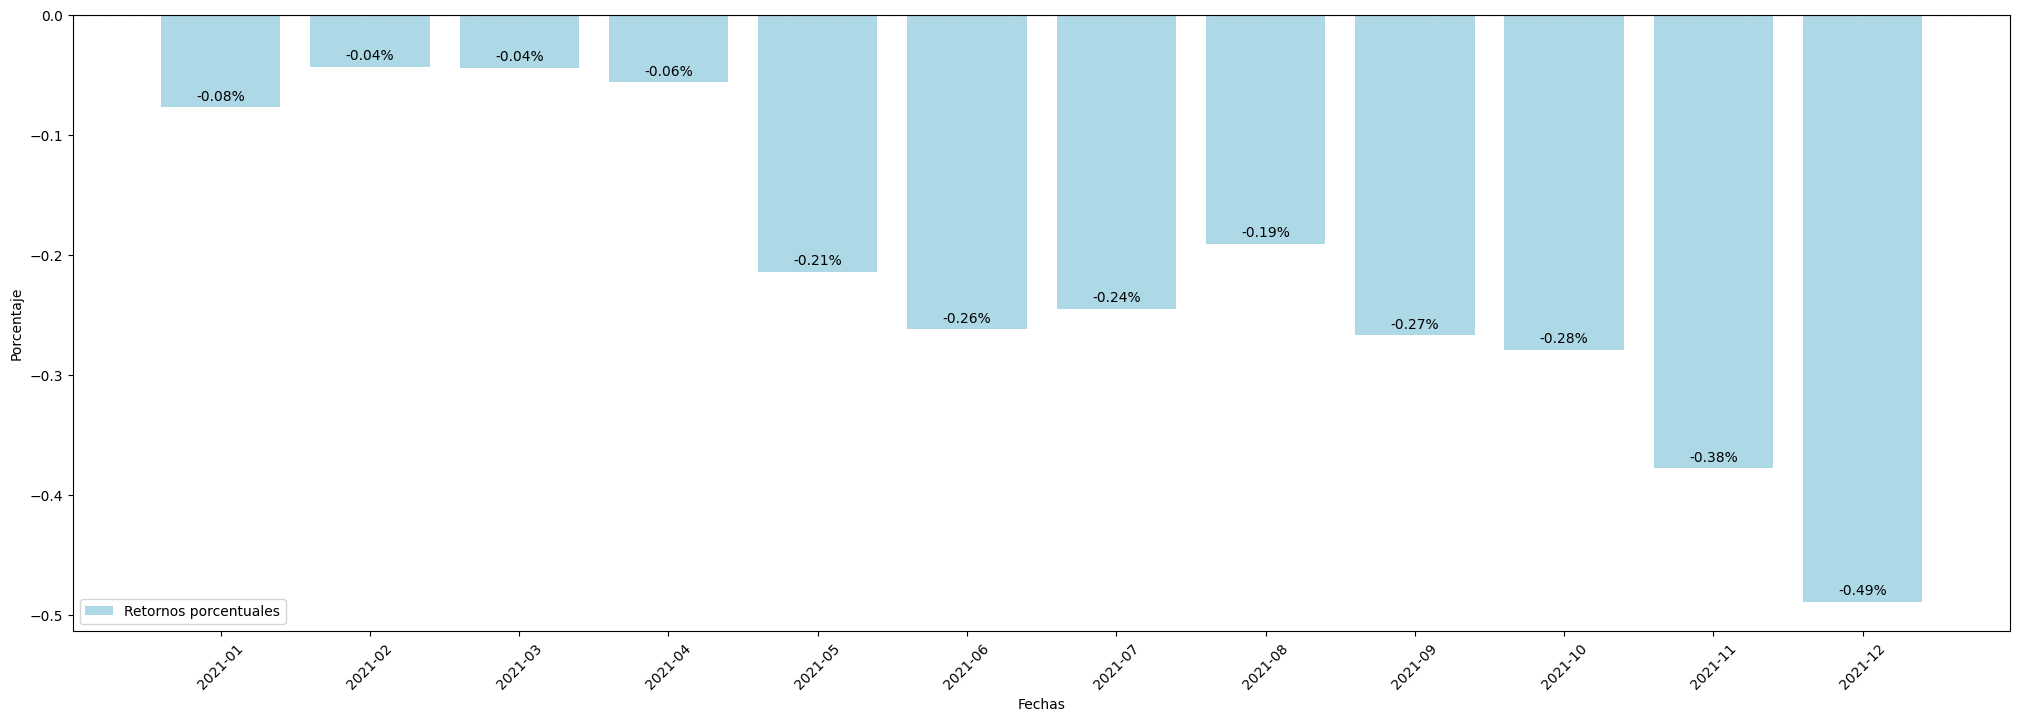

In [18]:
import matplotlib.pyplot as plt

# Datos de ejemplo
grow_perc = orders_per_month_gb[['close_time', 'perc_change_cumsum']]
fig, ax = plt.subplots(figsize=(25, 8))

x = grow_perc['close_time'].astype(str)
y = grow_perc['perc_change_cumsum']

# Crear barras
bars = ax.bar(x, y, label='Retornos porcentuales', color='lightblue')

# Agregar etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Agregar una línea de puntos horizontal en el valor 0
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Porcentaje')
ax.legend()

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [19]:
# Crear una columna que indique si la operación fue una pérdida
orders['is_loss'] = orders['profit'] < 0

# Crear una columna que cuente las rachas de pérdidas consecutivas
orders['consecutive_losses'] = orders['is_loss'].cumsum() - orders['is_loss'].cumsum().where(~orders['is_loss']).ffill().fillna(0).astype(int)

# Encontrar la máxima cantidad de pérdidas consecutivas
max_consecutive_losses = orders['consecutive_losses'].max()

print(f"La cantidad máxima de pérdidas consecutivas es: {max_consecutive_losses}")


La cantidad máxima de pérdidas consecutivas es: 17


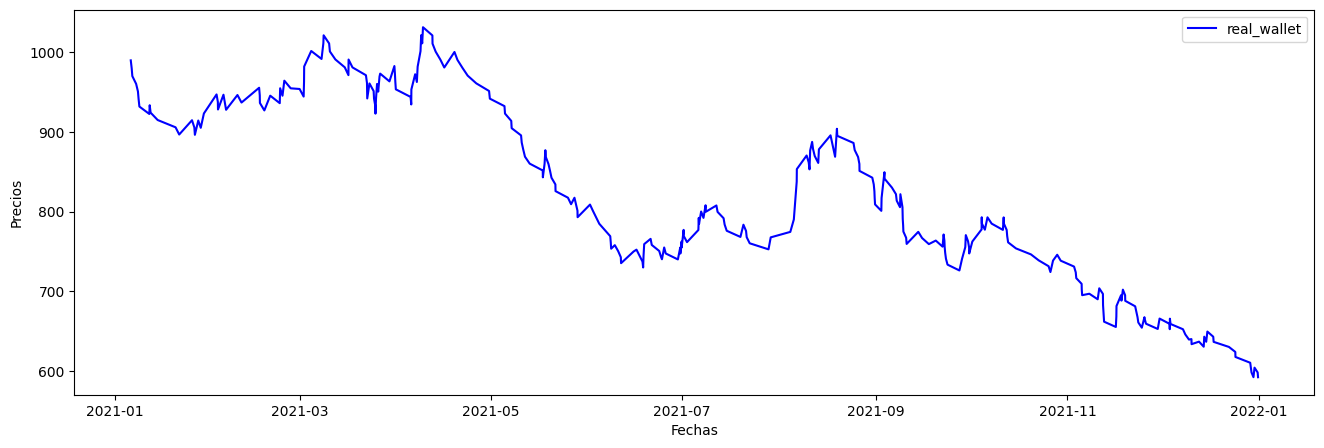

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [21]:
wallet.tail(1)

,date,wallet
305,2021-12-31 20:00:00,591.8925


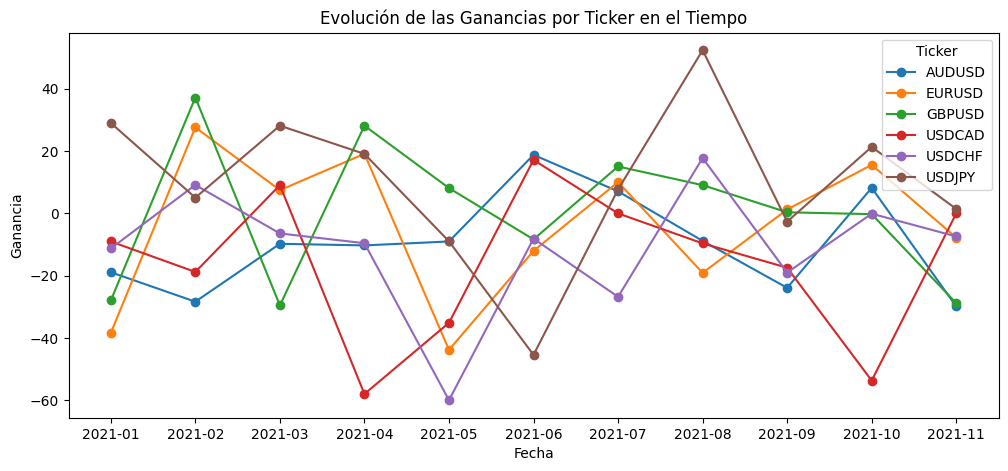

In [22]:
orders_per_month_ticker = orders[['close_time','profit', 'comment', 'ticker']].copy()
orders_per_month_ticker['close_time'] = pd.to_datetime(orders_per_month_ticker['close_time'])
orders_per_month_ticker['close_time'] = orders_per_month_ticker['close_time'].dt.to_period('M').astype(str)

profit_per_ticker = pd.DataFrame(orders_per_month_ticker.groupby(by=['ticker', 'close_time'])['profit'].sum()).reset_index()
all_dates = pd.date_range(start=profit_per_ticker['close_time'].min(), end=profit_per_ticker['close_time'].max(), freq='M').astype(str)

# Crea un DataFrame vacío con el rango de fechas para cada ticker
full_index = pd.MultiIndex.from_product([profit_per_ticker['ticker'].unique(), all_dates], names=['ticker', 'close_time'])
full_df = pd.DataFrame(index=full_index).reset_index()
full_df['close_time'] = pd.to_datetime(full_df['close_time'])
full_df['close_time'] = full_df['close_time'].dt.to_period('M').astype(str)

# Combina el DataFrame completo con el original
merged_df = pd.merge(full_df, profit_per_ticker, on=['ticker', 'close_time'], how='left')

# Rellena los valores faltantes con ceros o NaNs
merged_df['profit'] = merged_df['profit'].fillna(method='ffill')
# merged_df['profit'] = merged_df['profit'].fillna(method='ffill')

# Asegúrate de que los datos estén ordenados por ticker y close_time
merged_df = merged_df.sort_values(by=['ticker', 'close_time'])



plt.figure(figsize=(12, 5))

# Dibuja cada ticker por separado
for ticker in merged_df['ticker'].unique():
    ticker_data = merged_df[merged_df['ticker'] == ticker]
    plt.plot(ticker_data['close_time'].astype(str), ticker_data['profit'], marker='o', label=ticker)

# Añade títulos y etiquetas
plt.title('Evolución de las Ganancias por Ticker en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ganancia')
plt.legend(title='Ticker')

# Muestra el gráfico
plt.show()



In [23]:
orders_per_month_gb.perc_change.mean()

-0.04075

In [24]:
orders_per_month_gb.perc_change.std()

0.0645391001993788

In [25]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,-0.0770,2769.0000
2,0.0340,2863.1460
3,-0.0010,2860.2829
4,-0.0120,2825.9595
5,-0.1580,2379.4579
6,-0.0480,2265.2439
7,0.0170,2303.7530
8,0.0540,2428.1557
9,-0.0760,2243.6159


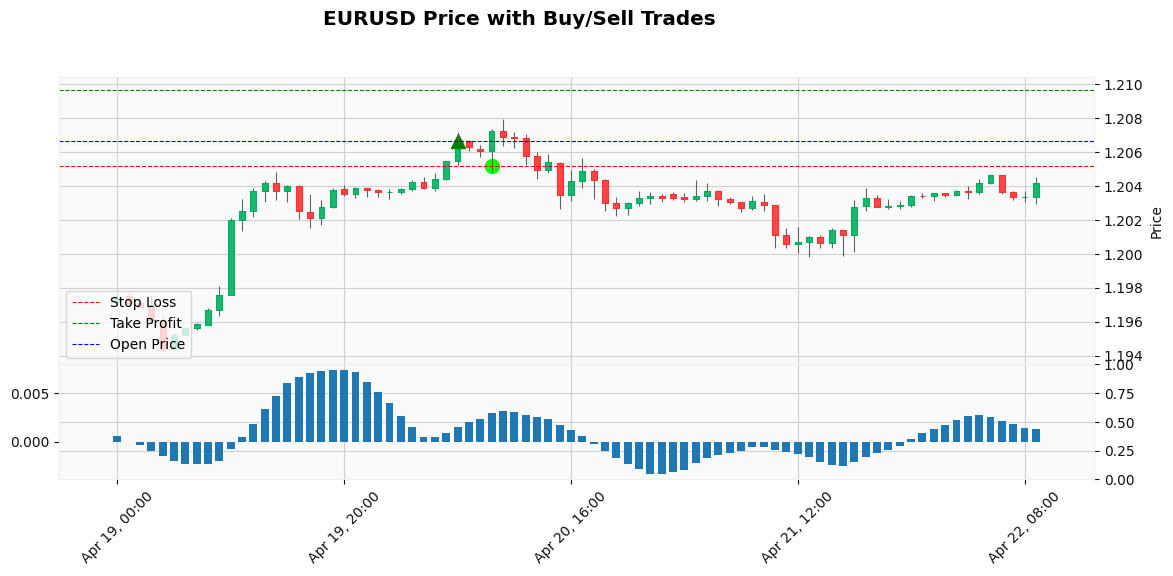

2021-04-18 06:00:00 2021-04-22 09:00:00
id                    c7e7d7e5-5022-11ef-b15c-f7a510197866
ticker                                              EURUSD
operation_type                           OperationType.BUY
open_time                              2021-04-20 06:00:00
close_time                             2021-04-20 09:00:00
open_price                                          1.2067
last_price                                          1.2067
close_price                                         1.2052
profit                                            -10.0050
stop_loss                                           1.2052
take_profit                                         1.2097
units                                                 6670
profit_in_pips                                     -0.0015
comment                        ClosePositionType.STOP_LOSS
is_loss                                               True
consecutive_losses                                       1
Name: 89, dtype:

In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import timedelta


for ticker in ['EURUSD', 'GBPUSD', 'USDJPY', 'USDCAD', 'AUDUSD', 'USDCHF']:
    # Cargar los datos de precios históricos
    prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
    # Convertir las columnas de fechas a formato datetime
    prices['Date'] = pd.to_datetime(prices['Date'])
    orders['close_time'] = pd.to_datetime(orders['close_time'])
    orders['open_time'] = pd.to_datetime(orders['open_time'])
    
    for index, order in orders[(orders.ticker == ticker)].iterrows():
        date_from = order.open_time - timedelta(hours=48)
        date_to = order.close_time + timedelta(hours=48)

        # Filtrar los precios históricos para el rango de fechas relevante
        historical_prices = prices[
            (prices['Date'] >= date_from) &
            (prices['Date'] <= date_to)
        ].copy()
    
        historical_prices.set_index('Date', inplace=True)
    
        # Crear las listas de anotaciones inicializadas con NaN
        open_annotations = [np.nan] * len(historical_prices)
        close_annotations = [np.nan] * len(historical_prices)
    
        # Buscar las posiciones correspondientes a las fechas de las operaciones
        if order.open_time in historical_prices.index:
            open_annotations[historical_prices.index.get_loc(order.open_time)] = order.open_price
        if order.close_time in historical_prices.index:
            close_annotations[historical_prices.index.get_loc(order.close_time)] = order.close_price
    
        if order.operation_type == 'OperationType.BUY':
            color_open = 'green'
            color_close = 'lime'
            marker_open = '^'  # Flecha hacia arriba
            marker_close = 'o'  # Círculo
        else:
            color_open = 'brown'
            color_close = 'brown'
            marker_open = 'v'  # Flecha hacia abajo
            marker_close = 'o'  # Círculo
    
        # Crear los addplot
        opens = mpf.make_addplot(open_annotations, type='scatter', markersize=100, marker=marker_open, color=color_open)
        closes = mpf.make_addplot(close_annotations, type='scatter', markersize=100, marker=marker_close, color=color_close)
        sqz = mpf.make_addplot(historical_prices['SQZ'],type='bar',width=0.7,panel=1,alpha=1,secondary_y=True)

        # sma = mpf.make_addplot(historical_prices['sma_200'])
        # upper_bband = mpf.make_addplot(historical_prices['upper_bband'])
        # lower_bband = mpf.make_addplot(historical_prices['lower_bband'])
        # aroon = mpf.make_addplot((historical_prices.upper_bband), panel=1,color='g')
        # adx = mpf.make_addplot((historical_prices.lower), panel=2,color='r')

        
        # Crear el gráfico de velas japonesas con mplfinance
        fig, axlist = mpf.plot(
            historical_prices, 
            type='candle', 
            style='yahoo', 
            returnfig=True, 
            volume=False, 
            title=f'{ticker} Price with Buy/Sell Trades', 
            figratio=(15,6),
            addplot=[opens, closes, sqz]
        )
    
        # Agregar las operaciones al gráfico
        ax = axlist[0]  # Acceder al primer subplot, que contiene el gráfico de velas
        # Agregar líneas horizontales para stop loss, take profit y precio de apertura
        ax.axhline(order.stop_loss, color='red', linewidth=0.8, linestyle='--', label='Stop Loss')
        ax.axhline(order.take_profit, color='green', linewidth=0.8, linestyle='--', label='Take Profit')
        ax.axhline(order.open_price, color='blue', linewidth=0.8, linestyle='--', label='Open Price')
    
        # Añadir etiquetas y leyenda
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        
        plt.xticks(rotation=45)
    
        plt.show()
        
        print(date_from, date_to)
        print(order)
        
        a = input()  # Pausa para la interacción del usuario
        clear_output()
        
        plt.close(fig)  # Cerrar la figura para la siguiente iteración


In [ ]:
orders.open_time = pd.to_datetime(orders.open_time)

losses = orders[(orders.comment == 'ClosePositionType.STOP_LOSS')].copy()
wins = orders[(orders.comment == 'ClosePositionType.TAKE_PROFIT')].copy()
wins['open_time'] = wins.open_time.dt.hour
losses['open_time'] = losses.open_time.dt.hour

plt.figure(figsize=(14, 5))

# plotting first histogram
plt.hist(wins['open_time'], label='wins', alpha=.8, edgecolor='black', bins=24)

# plotting second histogram
plt.hist(losses['open_time'], label='losses', alpha=0.7, bins=24)
plt.legend()

# Showing the plot using plt.show()
plt.show()


In [ ]:
orders.open_time = pd.to_datetime(orders.open_time)

orders_tp = orders[(orders.comment == 'ClosePositionType.TAKE_PROFIT')].copy()
orders_sl = orders[(orders.comment == 'ClosePositionType.STOP_LOSS')].copy()

orders_time_win = orders[(orders.comment == 'ClosePositionType.DAYS') & (orders.profit < 0)].copy()
orders_time_loss = orders[(orders.comment == 'ClosePositionType.DAYS') & (orders.profit >= 0 )].copy()

orders_tp['open_time'] = orders_tp.open_time.dt.hour
orders_sl['open_time'] = orders_sl.open_time.dt.hour
orders_time_win['open_time'] = orders_time_win.open_time.dt.hour
orders_time_loss['open_time'] = orders_time_loss.open_time.dt.hour

plt.figure(figsize=(14, 5))

# plotting first histogram
plt.hist(orders_tp['open_time'], label='tp', alpha=.8, edgecolor='black', bins=24)
plt.hist(orders_sl['open_time'], label='sl', alpha=0.7, bins=24)
plt.hist(orders_time_win['open_time'], label='time_win', alpha=0.7, bins=24)
plt.hist(orders_time_loss['open_time'], label='time_loss', alpha=0.7, bins=24)

plt.legend()

# Showing the plot using plt.show()
plt.show()


In [ ]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

# Que hubiera pasado si no se operaba con algunos tickers?

In [ ]:
# tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
# print(tickers_permitidos)

tickers_permitidos = [
    'EURUSD', 
    'GBPUSD', 
    # 'USDJPY', 
    # 'USDCAD', 
    # 'AUDUSD', 
    # 'USDCHF'
]

orders_min = orders[orders['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [ ]:
orders_min['close_month'] = pd.to_datetime(orders_min['close_time'])
orders_min['close_month'] = orders_min['close_month'].dt.to_period('M')

orders_per_month_gb = orders_min.groupby(by=['close_month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2022-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'close_month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb

In [ ]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [ ]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

In [ ]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [ ]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

In [ ]:
predictions.binary_pred.hist()

In [ ]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [ ]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.05)

In [ ]:
threshold = 0.45
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [ ]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [ ]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

# features = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]].named_estimators_['prob_transf']
features = get_xgboost_feature_importance_from_stacking(pipeline)

In [ ]:
names = []
values = []

for k, v in features.items():
    names.append(k)
    values.append(v)

features_df = pd.DataFrame({'feature':names, 'importance':values})
features_df.sort_values(by='importance', ascending=False)


In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()